In [ ]:
'''
 * Copyright (c) 2016 Radhamadhab Dalai
 *
 * Permission is hereby granted, free of charge, to any person obtaining a copy
 * of this software and associated documentation files (the "Software"), to deal
 * in the Software without restriction, including without limitation the rights
 * to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
 * copies of the Software, and to permit persons to whom the Software is
 * furnished to do so, subject to the following conditions:
 *
 * The above copyright notice and this permission notice shall be included in
 * all copies or substantial portions of the Software.
 *
 * THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 * IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 * FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
 * AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 * LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
 * OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
 * THE SOFTWARE.
'''

## 4.2 Eigenvalues and Eigenvectors

We will now get to know a new way to characterize a matrix and its associated linear mapping. Recall from Section 2.7.1 that every linear mapping has a unique transformation matrix given an ordered basis. We can interpret linear mappings and their associated transformation matrices by performing an “eigen” analysis. As we will see, the eigenvalues of a linear mapping will tell us how a special set of vectors, the eigenvectors, is transformed by the linear mapping.

*Eigen* is a German word meaning “characteristic”, “self”, or “own”.

**Definition 4.6.** Let $ A \in \mathbb{R}^{n \times n} $ be a square matrix. Then $ \lambda \in \mathbb{R} $ is an *eigenvalue* of $ A $ and $ x \in \mathbb{R}^n \setminus \{0\} $ is the corresponding *eigenvector* of $ A $ if

$$
A x = \lambda x. \tag{4.25}
$$

We call (4.25) the *eigenvalue equation*.

**Remark.** In the linear algebra literature and software, it is often a convention that eigenvalues are sorted in descending order, so that the largest eigenvalue and associated eigenvector are called the first eigenvalue and its associated eigenvector, and the second largest called the second eigenvalue and its associated eigenvector, and so on. However, textbooks and publications may have different or no notion of orderings. We do not want to presume an ordering in this book if not stated explicitly. $ \diamond $

The following statements are equivalent:

- $ \lambda $ is an eigenvalue of $ A \in \mathbb{R}^{n \times n} $.
- There exists an $ x \in \mathbb{R}^n \setminus \{0\} $ with $ A x = \lambda x $, or equivalently, $ (A - \lambda I_n) x = 0 $ can be solved non-trivially, i.e., $ x \neq 0 $.
- $ \text{rk}(A - \lambda I_n) < n $.
- $ \det(A - \lambda I_n) = 0 $.

**Definition 4.7 (Collinearity and Codirection).** Two vectors that point in the same direction are called *codirected*. Two vectors are *collinear* if they point in the same or the opposite direction.

**Remark (Non-uniqueness of eigenvectors).** If $ x $ is an eigenvector of $ A $ associated with eigenvalue $ \lambda $, then for any $ c \in \mathbb{R} \setminus \{0\} $ it holds that $ c x $ is an eigenvector of $ A $ with the same eigenvalue since

$$
A (c x) = c A x = c \lambda x = \lambda (c x). \tag{4.26}
$$

Thus, all vectors that are collinear to $ x $ are also eigenvectors of $ A $.

**Theorem 4.8.** $ \lambda \in \mathbb{R} $ is an eigenvalue of $ A \in \mathbb{R}^{n \times n} $ if and only if $ \lambda $ is a root of the characteristic polynomial $ p_A(\lambda) $ of $ A $.

**Definition 4.9.** Let a square matrix $ A $ have an eigenvalue $ \lambda_i $. The *algebraic multiplicity* of $ \lambda_i $ is the number of times the root appears in the characteristic polynomial.

**Definition 4.10 (Eigenspace and Eigenspectrum).** For $ A \in \mathbb{R}^{n \times n} $, the set of all eigenvectors of $ A $ associated with an eigenvalue $ \lambda $ spans a subspace of $ \mathbb{R}^n $, which is called the *eigenspace* of $ A $ with respect to $ \lambda $ and is denoted by $ E_\lambda $. The set of all eigenvalues of $ A $ is called the *eigenspectrum*, or just *spectrum*, of $ A $.

If $ \lambda $ is an eigenvalue of $ A \in \mathbb{R}^{n \times n} $, then the corresponding eigenspace $ E_\lambda $ is the solution space of the homogeneous system of linear equations $ (A - \lambda I) x = 0 $.

Geometrically, the eigenvector corresponding to a nonzero eigenvalue points in a direction that is stretched by the linear mapping. The eigenvalue is the factor by which it is stretched. If the eigenvalue is negative, the direction of the stretching is flipped.

### Example 4.4 (The Case of the Identity Matrix)

The identity matrix $ I \in \mathbb{R}^{n \times n} $ has characteristic polynomial

$$
p_I(\lambda) = \det(I - \lambda I) = (1 - \lambda)^n = 0,
$$

which has only one eigenvalue $ \lambda = 1 $ that occurs $ n $ times. Moreover, $ I x = \lambda x = 1 x $ holds for all vectors $ x \in \mathbb{R}^n \setminus \{0\} $. Because of this, the sole eigenspace $ E_1 $ of the identity matrix spans $ n $ dimensions, and all $ n $ standard basis vectors of $ \mathbb{R}^n $ are eigenvectors of $ I $.

Useful properties regarding eigenvalues and eigenvectors include the following:

- A matrix $ A $ and its transpose $ A^\top $ possess the same eigenvalues, but not necessarily the same eigenvectors.
- The eigenspace $ E_\lambda $ is the null space of $ A - \lambda I $ since

$$
A x = \lambda x \quad \iff \quad A x - \lambda x = 0 \tag{4.27a}
$$

$$
\iff \quad (A - \lambda I) x = 0 \quad \iff \quad x \in \text{ker}(A - \lambda I). \tag{4.27b}
$$

- Similar matrices (see Definition 2.22) possess the same eigenvalues. Therefore, a linear mapping $ \Phi $ has eigenvalues that are independent of the choice of basis of its transformation matrix. This makes eigenvalues, together with the determinant and the trace, key characteristic parameters of a linear mapping as they are all invariant under basis change.
- Symmetric, positive definite matrices always have positive, real eigenvalues.

In [1]:
import math

# --- Matrix-Vector Multiplication ---
def matrix_vector_multiply(A, x):
    """
    Multiply matrix A (n x m) by vector x (m x 1). Returns a vector.
    """
    n = len(A)
    result = [0.0] * n
    for i in range(n):
        result[i] = sum(A[i][j] * x[j] for j in range(len(x)))
    return result

# --- Transpose of a Matrix ---
def transpose(A):
    """
    Compute the transpose of matrix A.
    """
    n, m = len(A), len(A[0])
    return [[A[j][i] for j in range(n)] for i in range(m)]

# --- Subtract Lambda * Identity from A ---
def subtract_lambda_I(A, lambda_val):
    """
    Compute A - lambda * I for a square matrix A.
    """
    n = len(A)
    result = [[A[i][j] for j in range(n)] for i in range(n)]
    for i in range(n):
        result[i][i] -= lambda_val
    return result

# --- Determinant of a 2x2 Matrix ---
def determinant_2x2(A):
    """
    Compute the determinant of a 2x2 matrix.
    """
    return A[0][0] * A[1][1] - A[0][1] * A[1][0]

# --- Compute Eigenvalues (Solve Characteristic Polynomial) ---
def compute_eigenvalues(A):
    """
    Compute the eigenvalues of a 2x2 matrix A by solving det(A - lambda I) = 0.
    Returns a list of eigenvalues.
    """
    if len(A) != 2 or len(A[0]) != 2:
        raise ValueError("This implementation only supports 2x2 matrices")
    
    # Characteristic polynomial: det(A - lambda I) = lambda^2 - tr(A)*lambda + det(A)
    a11, a12 = A[0][0], A[0][1]
    a21, a22 = A[1][0], A[1][1]
    tr_A = a11 + a22
    det_A = determinant_2x2(A)
    
    # Solve quadratic equation: lambda^2 - tr(A)*lambda + det_A = 0
    # Discriminant: tr(A)^2 - 4*det(A)
    discriminant = tr_A**2 - 4 * det_A
    if discriminant < 0:
        raise ValueError("This implementation only handles real eigenvalues")
    
    sqrt_disc = math.sqrt(discriminant)
    lambda1 = (tr_A + sqrt_disc) / 2
    lambda2 = (tr_A - sqrt_disc) / 2
    return [lambda1, lambda2]

# --- Compute Eigenvectors ---
def compute_eigenvector(A, lambda_val):
    """
    Compute an eigenvector for the given eigenvalue lambda by solving (A - lambda I)x = 0.
    Returns a non-zero eigenvector (first non-trivial solution).
    """
    # Compute A - lambda I
    M = subtract_lambda_I(A, lambda_val)
    
    # Solve (A - lambda I)x = 0
    # For a 2x2 matrix, this is a system of 2 equations
    # If M = [[a, b], [c, d]], then ax + by = 0, cx + dy = 0
    a, b = M[0][0], M[0][1]
    c, d = M[1][0], M[1][1]
    
    # Try to solve for a non-trivial solution
    # Case 1: If a != 0, solve first equation: ax + by = 0 => y = -(a/b)x
    if abs(a) > 1e-10:
        x = 1.0
        y = -a * x / b if abs(b) > 1e-10 else 0.0
    # Case 2: If a = 0, use second equation: cx + dy = 0
    elif abs(c) > 1e-10:
        x = 1.0
        y = -c * x / d if abs(d) > 1e-10 else 0.0
    # Case 3: If a = c = 0, set x or y arbitrarily
    else:
        x = 1.0 if abs(b) > 1e-10 else 0.0
        y = 1.0 if abs(d) > 1e-10 else 0.0
    
    return [x, y]

# --- Verify Eigenvector ---
def verify_eigenvector(A, x, lambda_val):
    """
    Verify that Ax = lambda x for the given eigenvector and eigenvalue.
    """
    Ax = matrix_vector_multiply(A, x)
    lambda_x = [lambda_val * xi for xi in x]
    return all(abs(ax - lx) < 1e-10 for ax, lx in zip(Ax, lambda_x))

# --- Run the Implementation ---
# Compute Eigenvalues and Eigenvectors
print("Eigenvalues and Eigenvectors (Section 4.2):")
A = [[3, 1], [1, 3]]  # Example: Symmetric matrix
print("Matrix A:")
for row in A:
    print(row)

# Compute eigenvalues
eigenvalues = compute_eigenvalues(A)
print(f"\nEigenvalues: {[round(l, 3) for l in eigenvalues]}")

# Compute and verify eigenvectors
eigenvectors = []
for lambda_val in eigenvalues:
    x = compute_eigenvector(A, lambda_val)
    eigenvectors.append(x)
    print(f"Eigenvalue {round(lambda_val, 3)}: Eigenvector {x}")
    print(f"Verification Ax = lambda x: {verify_eigenvector(A, x, lambda_val)}")

# Eigenspace (Definition 4.10): (A - lambda I)x = 0
print("\nEigenspace Verification:")
for lambda_val, x in zip(eigenvalues, eigenvectors):
    M = subtract_lambda_I(A, lambda_val)
    Mx = matrix_vector_multiply(M, x)
    print(f"For lambda = {round(lambda_val, 3)}, (A - lambda I)x = {Mx}")
    print(f"Is in null space: {all(abs(v) < 1e-10 for v in Mx)}")

# Example 4.4: Identity Matrix
print("\nExample 4.4: Identity Matrix")
I = [[1, 0], [0, 1]]
print("Identity Matrix I:")
for row in I:
    print(row)

eigenvalues_I = compute_eigenvalues(I)
print(f"Eigenvalues of I: {eigenvalues_I}")
# Eigenspace: All vectors are eigenvectors with eigenvalue 1
x1 = [1, 0]
x2 = [0, 1]
print(f"Verification for x = {x1}: {verify_eigenvector(I, x1, 1.0)}")
print(f"Verification for x = {x2}: {verify_eigenvector(I, x2, 1.0)}")

# Property: A and A^T have the same eigenvalues
print("\nProperty: A and A^T have the same eigenvalues")
A_T = transpose(A)
eigenvalues_A_T = compute_eigenvalues(A_T)
print(f"Eigenvalues of A: {eigenvalues}")
print(f"Eigenvalues of A^T: {eigenvalues_A_T}")
print(f"Match: {all(abs(l1 - l2) < 1e-10 for l1, l2 in zip(eigenvalues, eigenvalues_A_T))}")

Eigenvalues and Eigenvectors (Section 4.2):
Matrix A:
[3, 1]
[1, 3]

Eigenvalues: [4.0, 2.0]
Eigenvalue 4.0: Eigenvector [1.0, 1.0]
Verification Ax = lambda x: True
Eigenvalue 2.0: Eigenvector [1.0, -1.0]
Verification Ax = lambda x: True

Eigenspace Verification:
For lambda = 4.0, (A - lambda I)x = [0.0, 0.0]
Is in null space: True
For lambda = 2.0, (A - lambda I)x = [0.0, 0.0]
Is in null space: True

Example 4.4: Identity Matrix
Identity Matrix I:
[1, 0]
[0, 1]
Eigenvalues of I: [1.0, 1.0]
Verification for x = [1, 0]: True
Verification for x = [0, 1]: True

Property: A and A^T have the same eigenvalues
Eigenvalues of A: [4.0, 2.0]
Eigenvalues of A^T: [4.0, 2.0]
Match: True


### Example 4.5 (Computing Eigenvalues, Eigenvectors, and Eigenspaces)

Let us find the eigenvalues and eigenvectors of the $ 2 \times 2 $ matrix

$$
A = \begin{bmatrix} 4 & 2 \\ 1 & 3 \end{bmatrix}. \tag{4.28}
$$

**Step 1: Characteristic Polynomial.** From our definition of the eigenvector $ x \neq 0 $ and eigenvalue $ \lambda $ of $ A $, there will be a vector such that $ A x = \lambda x $, i.e., $ (A - \lambda I) x = 0 $. Since $ x \neq 0 $, this requires that the kernel (null space) of $ A - \lambda I $ contains more elements than just 0. This means that $ A - \lambda I $ is not invertible and therefore $ \det(A - \lambda I) = 0 $. Hence, we need to compute the roots of the characteristic polynomial (4.22a) to find the eigenvalues.

**Step 2: Eigenvalues.** The characteristic polynomial is

$$
p_A(\lambda) = \det(A - \lambda I) \tag{4.29a}
$$

$$
= \det\left( \begin{bmatrix} 4 & 2 \\ 1 & 3 \end{bmatrix} - \begin{bmatrix} \lambda & 0 \\ 0 & \lambda \end{bmatrix} \right) = \det \begin{bmatrix} 4 - \lambda & 2 \\ 1 & 3 - \lambda \end{bmatrix} \tag{4.29b}
$$

$$
= (4 - \lambda)(3 - \lambda) - 2 \cdot 1. \tag{4.29c}
$$

We factorize the characteristic polynomial and obtain

$$
p(\lambda) = (4 - \lambda)(3 - \lambda) - 2 \cdot 1 = 10 - 7\lambda + \lambda^2 = (2 - \lambda)(5 - \lambda) \tag{4.30}
$$

giving the roots $ \lambda_1 = 2 $ and $ \lambda_2 = 5 $.

**Step 3: Eigenvectors and Eigenspaces.** We find the eigenvectors that correspond to these eigenvalues by looking at vectors $ x $ such that

$$
\begin{bmatrix} 4 - \lambda & 2 \\ 1 & 3 - \lambda \end{bmatrix} x = 0. \tag{4.31}
$$

For $ \lambda = 5 $ we obtain

$$
\begin{bmatrix} 4 - 5 & 2 \\ 1 & 3 - 5 \end{bmatrix} \begin{bmatrix} x_1 \\ x_2 \end{bmatrix} = \begin{bmatrix} -1 & 2 \\ 1 & -2 \end{bmatrix} \begin{bmatrix} x_1 \\ x_2 \end{bmatrix} = 0. \tag{4.32}
$$

We solve this homogeneous system and obtain a solution space

$$
E_5 = \text{span} \begin{bmatrix} 2 \\ 1 \end{bmatrix}. \tag{4.33}
$$

This eigenspace is one-dimensional as it possesses a single basis vector.

Analogously, we find the eigenvector for $ \lambda = 2 $ by solving the homogeneous system of equations

$$
\begin{bmatrix} 4 - 2 & 2 \\ 1 & 3 - 2 \end{bmatrix} x = \begin{bmatrix} 2 & 2 \\ 1 & 1 \end{bmatrix} x = 0. \tag{4.34}
$$

This means any vector $ x = \begin{bmatrix} x_1 \\ x_2 \end{bmatrix} $, where $ x_2 = -x_1 $, such as $ \begin{bmatrix} 1 \\ -1 \end{bmatrix} $, is an eigenvector with eigenvalue 2. The corresponding eigenspace is given as

$$
E_2 = \text{span} \begin{bmatrix} 1 \\ -1 \end{bmatrix}. \tag{4.35}
$$

The two eigenspaces $ E_5 $ and $ E_2 $ in Example 4.5 are one-dimensional as they are each spanned by a single vector. However, in other cases we may have multiple identical eigenvalues (see Definition 4.9) and the eigenspace may have more than one dimension.

**Definition 4.11.** Let $ \lambda_i $ be an eigenvalue of a square matrix $ A $. Then the *geometric multiplicity* of $ \lambda_i $ is the number of linearly independent eigenvectors associated with $ \lambda_i $. In other words, it is the dimensionality of the eigenspace spanned by the eigenvectors associated with $ \lambda_i $.

**Remark.** A specific eigenvalue’s geometric multiplicity must be at least one because every eigenvalue has at least one associated eigenvector. An eigenvalue’s geometric multiplicity cannot exceed its algebraic multiplicity, but it may be lower. $ \diamond $

### Example 4.6

The matrix $ A = \begin{bmatrix} 2 & 1 \\ 0 & 2 \end{bmatrix} $ has two repeated eigenvalues $ \lambda_1 = \lambda_2 = 2 $ and an algebraic multiplicity of 2. The eigenvalue has, however, only one distinct unit eigenvector $ x_1 = \begin{bmatrix} 1 \\ 0 \end{bmatrix} $ and, thus, geometric multiplicity 1.

### Graphical Intuition in Two Dimensions
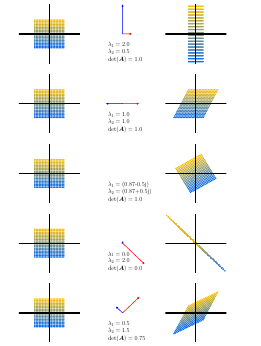

Fig.4 Determinants and eigenspaces. Overview of five linear mappings and their associated transformation matrices $A_i$ ∈ R2×2 projecting 400 color-coded points x ∈ R2 (left column) onto target points $A_i$ x (right column). The central column depicts the first eigenvector, stretched by its associated eigenvalue $λ1$ , and the second eigenvector stretched by its eigenvalue λ2 . Each row depicts the effect of one of five transformation matrices Ai with respect to the standard basis.

Let us gain some intuition for determinants, eigenvectors, and eigenvalues using different linear mappings. **Fig.4** depicts five transformation matrices $ A_1, \ldots, A_5 $ and their impact on a square grid of points, centered at the origin:

$$
A_1 = \begin{bmatrix} \frac{1}{2} & 0 \\ 0 & 2 \end{bmatrix}.
$$

The direction of the two eigenvectors correspond to the canonical basis vectors in $ \mathbb{R}^2 $, i.e., to two cardinal axes. The vertical axis $ e_2 $ is extended by a factor of 2 (eigenvalue $ \lambda_1 = 2 $), and the horizontal axis $ e_1 $ is compressed by factor $ \frac{1}{2} $ (eigenvalue $ \lambda_2 = \frac{1}{2} $). The mapping is area preserving ($ \det(A_1) = 1 = 2 \cdot \frac{1}{2} $).

$$
A_2 = \begin{bmatrix} 1 & \frac{1}{2} \\ 0 & 1 \end{bmatrix}
$$

corresponds to a *shearing mapping*, i.e., it shears the points along the horizontal axis to the right if they are on the positive

In [2]:
import math

# --- Matrix-Vector Multiplication ---
def matrix_vector_multiply(A, x):
    """
    Multiply matrix A (n x m) by vector x (m x 1). Returns a vector.
    """
    n = len(A)
    result = [0.0] * n
    for i in range(n):
        result[i] = sum(A[i][j] * x[j] for j in range(len(x)))
    return result

# --- Determinant of a 2x2 Matrix ---
def determinant_2x2(A):
    """
    Compute the determinant of a 2x2 matrix.
    """
    return A[0][0] * A[1][1] - A[0][1] * A[1][0]

# --- Subtract Lambda * Identity from A ---
def subtract_lambda_I(A, lambda_val):
    """
    Compute A - lambda * I for a square matrix A.
    """
    n = len(A)
    result = [[A[i][j] for j in range(n)] for i in range(n)]
    for i in range(n):
        result[i][i] -= lambda_val
    return result

# --- Compute Eigenvalues ---
def compute_eigenvalues(A):
    """
    Compute the eigenvalues of a 2x2 matrix A by solving det(A - lambda I) = 0.
    Returns a list of eigenvalues.
    """
    if len(A) != 2 or len(A[0]) != 2:
        raise ValueError("This implementation only supports 2x2 matrices")
    
    # Characteristic polynomial: det(A - lambda I) = lambda^2 - tr(A)*lambda + det(A)
    a11, a12 = A[0][0], A[0][1]
    a21, a22 = A[1][0], A[1][1]
    tr_A = a11 + a22
    det_A = determinant_2x2(A)
    
    # Solve: lambda^2 - tr(A)*lambda + det_A = 0
    discriminant = tr_A**2 - 4 * det_A
    if discriminant < 0:
        raise ValueError("This implementation only handles real eigenvalues")
    
    sqrt_disc = math.sqrt(discriminant)
    lambda1 = (tr_A + sqrt_disc) / 2
    lambda2 = (tr_A - sqrt_disc) / 2
    return [lambda1, lambda2]

# --- Compute Eigenvector ---
def compute_eigenvector(A, lambda_val):
    """
    Compute an eigenvector for the given eigenvalue lambda by solving (A - lambda I)x = 0.
    Returns a non-zero eigenvector.
    """
    M = subtract_lambda_I(A, lambda_val)
    a, b = M[0][0], M[0][1]
    c, d = M[1][0], M[1][1]
    
    # Solve (A - lambda I)x = 0
    if abs(a) > 1e-10:
        x = 1.0
        y = -a * x / b if abs(b) > 1e-10 else 0.0
    elif abs(c) > 1e-10:
        x = 1.0
        y = -c * x / d if abs(d) > 1e-10 else 0.0
    else:
        x = 1.0 if abs(b) > 1e-10 else 0.0
        y = 1.0 if abs(d) > 1e-10 else 0.0
    
    return [x, y]

# --- Verify Eigenvector ---
def verify_eigenvector(A, x, lambda_val):
    """
    Verify that Ax = lambda x for the given eigenvector and eigenvalue.
    """
    Ax = matrix_vector_multiply(A, x)
    lambda_x = [lambda_val * xi for xi in x]
    return all(abs(ax - lx) < 1e-10 for ax, lx in zip(Ax, lambda_x))

# --- Run the Implementation ---
# Example 4.5: Eigenvalues, Eigenvectors, and Eigenspaces
print("Example 4.5: Eigenvalues, Eigenvectors, and Eigenspaces")
A = [[4, 2], [1, 3]]
print("Matrix A (Equation 4.28):")
for row in A:
    print(row)

# Step 1 & 2: Compute eigenvalues (Equations 4.29–4.30)
eigenvalues = compute_eigenvalues(A)
print(f"\nEigenvalues (Equation 4.30): {[round(l, 3) for l in eigenvalues]}")

# Step 3: Compute eigenvectors and eigenspaces (Equations 4.31–4.35)
eigenvectors = []
for lambda_val in eigenvalues:
    x = compute_eigenvector(A, lambda_val)
    eigenvectors.append(x)
    print(f"\nFor lambda = {round(lambda_val, 3)}:")
    print(f"Eigenvector: {x}")
    print(f"Verification Ax = lambda x: {verify_eigenvector(A, x, lambda_val)}")
    print(f"Eigenspace: span{[round(xi, 3) for xi in x]}")

# Example 4.6: Repeated Eigenvalues and Geometric Multiplicity
print("\nExample 4.6: Repeated Eigenvalues")
A2 = [[2, 1], [0, 2]]
print("Matrix A:")
for row in A2:
    print(row)

eigenvalues_A2 = compute_eigenvalues(A2)
print(f"\nEigenvalues: {eigenvalues_A2}")
# Compute eigenvectors
unique_eigenvectors = []
for lambda_val in set(eigenvalues_A2):
    x = compute_eigenvector(A2, lambda_val)
    unique_eigenvectors.append(x)
    print(f"\nFor lambda = {lambda_val}:")
    print(f"Eigenvector: {x}")
    print(f"Verification Ax = lambda x: {verify_eigenvector(A2, x, lambda_val)}")

print(f"Algebraic multiplicity of lambda = 2: {eigenvalues_A2.count(2)}")
print(f"Geometric multiplicity: {len(unique_eigenvectors)}")

# Graphical Intuition: A1 and A2
print("\nGraphical Intuition in Two Dimensions")
A1 = [[0.5, 0], [0, 2]]
print("Matrix A1:")
for row in A1:
    print(row)

eigenvalues_A1 = compute_eigenvalues(A1)
print(f"\nEigenvalues of A1: {[round(l, 3) for l in eigenvalues_A1]}")
det_A1 = determinant_2x2(A1)
print(f"Determinant of A1: {det_A1} (area preserving)")

A2_shear = [[1, 0.5], [0, 1]]
print("\nMatrix A2 (Shearing):")
for row in A2_shear:
    print(row)

eigenvalues_A2 = compute_eigenvalues(A2_shear)
print(f"\nEigenvalues of A2: {eigenvalues_A2}")

Example 4.5: Eigenvalues, Eigenvectors, and Eigenspaces
Matrix A (Equation 4.28):
[4, 2]
[1, 3]

Eigenvalues (Equation 4.30): [5.0, 2.0]

For lambda = 5.0:
Eigenvector: [1.0, 0.5]
Verification Ax = lambda x: True
Eigenspace: span[1.0, 0.5]

For lambda = 2.0:
Eigenvector: [1.0, -1.0]
Verification Ax = lambda x: True
Eigenspace: span[1.0, -1.0]

Example 4.6: Repeated Eigenvalues
Matrix A:
[2, 1]
[0, 2]

Eigenvalues: [2.0, 2.0]

For lambda = 2.0:
Eigenvector: [1.0, 0.0]
Verification Ax = lambda x: True
Algebraic multiplicity of lambda = 2: 2
Geometric multiplicity: 1

Graphical Intuition in Two Dimensions
Matrix A1:
[0.5, 0]
[0, 2]

Eigenvalues of A1: [2.0, 0.5]
Determinant of A1: 1.0 (area preserving)

Matrix A2 (Shearing):
[1, 0.5]
[0, 1]

Eigenvalues of A2: [1.0, 1.0]


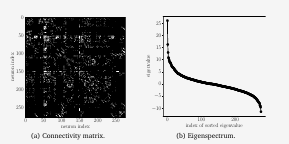

half of the vertical axis, and to the left vice versa. This mapping is area preserving ($ \det(A_2) = 1 $). The eigenvalue $ \lambda_1 = 1 = \lambda_2 $ is repeated and the eigenvectors are collinear (drawn here for emphasis in two opposite directions). This indicates that the mapping acts only along one direction (the horizontal axis).

$$
A_3 = \begin{bmatrix} \cos\left(\frac{\pi}{6}\right) & -\sin\left(\frac{\pi}{6}\right) \\ \sin\left(\frac{\pi}{6}\right) & \cos\left(\frac{\pi}{6}\right) \end{bmatrix} = \begin{bmatrix} \frac{\sqrt{3}}{2} & -\frac{1}{2} \\ \frac{1}{2} & \frac{\sqrt{3}}{2} \end{bmatrix}
$$

The matrix $ A_3 $ rotates the points by $ \frac{\pi}{6} $ rad = $ 30^\circ $ counter-clockwise and has only complex eigenvalues, reflecting that the mapping is a rotation (hence, no eigenvectors are drawn). A rotation has to be volume preserving, and so the determinant is 1. For more details on rotations, we refer to Section 3.9.

$$
A_4 = \begin{bmatrix} 1 & -1 \\ -1 & 1 \end{bmatrix}
$$

represents a mapping in the standard basis that collapses a two-dimensional domain onto one dimension. Since one eigenvalue is 0, the space in direction of the (blue) eigenvector corresponding to $ \lambda_1 = 0 $ collapses, while the orthogonal (red) eigenvector stretches space by a factor $ \lambda_2 = 2 $. Therefore, the area of the image is 0.

$$
A_5 = \begin{bmatrix} 1 & \frac{1}{2} \\ \frac{1}{2} & 1 \end{bmatrix}
$$

is a shear-and-stretch mapping that scales space by 75% since $ |\det(A_5)| = \frac{3}{4} $. It stretches space along the (red) eigenvector of $ \lambda_2 $ by a factor 1.5 and compresses it along the orthogonal (blue) eigenvector by a factor 0.5.

### Example 4.7 (Eigenspectrum of a Biological Neural Network)

**Figure 4.5**

(a) Connectivity matrix.

(b) Eigenspectrum.

Methods to analyze and learn from network data are an essential component of machine learning methods. The key to understanding networks is the connectivity between network nodes, especially if two nodes are connected to each other or not. In data science applications, it is often useful to study the matrix that captures this connectivity data.

We build a connectivity/adjacency matrix $ A \in \mathbb{R}^{277 \times 277} $ of the complete neural network of the worm *C. Elegans*. Each row/column represents one of the 277 neurons of this worm’s brain. The connectivity matrix $ A $ has a value of $ a_{ij} = 1 $ if neuron $ i $ talks to neuron $ j $ through a synapse, and $ a_{ij} = 0 $ otherwise. The connectivity matrix is not symmetric, which implies that eigenvalues may not be real valued. Therefore, we compute a symmetrized version of the connectivity matrix as

$$
A_{\text{sym}} := A + A^\top.
$$

This new matrix $ A_{\text{sym}} $ is shown in Figure 4.5(a) and has a nonzero value $ a_{ij} $ if and only if two neurons are connected (white pixels), irrespective of the direction of the connection. In Figure 4.5(b), we show the corresponding eigenspectrum of $ A_{\text{sym}} $. The horizontal axis shows the index of the eigenvalues, sorted in descending order. The vertical axis shows the corresponding eigenvalue. The S-like shape of this eigenspectrum is typical for many biological neural networks. The underlying mechanism responsible for this is an area of active neuroscience research.

In [3]:
import math

# --- Determinant of a 2x2 Matrix ---
def determinant_2x2(A):
    """
    Compute the determinant of a 2x2 matrix.
    """
    return A[0][0] * A[1][1] - A[0][1] * A[1][0]

# --- Transpose of a Matrix ---
def transpose(A):
    """
    Compute the transpose of matrix A.
    """
    n, m = len(A), len(A[0])
    return [[A[j][i] for j in range(n)] for i in range(m)]

# --- Matrix Addition ---
def matrix_add(A, B):
    """
    Add two matrices A and B of the same size.
    """
    n, m = len(A), len(A[0])
    return [[A[i][j] + B[i][j] for j in range(m)] for i in range(n)]

# --- Compute Eigenvalues ---
def compute_eigenvalues(A):
    """
    Compute the eigenvalues of a 2x2 matrix A by solving det(A - lambda I) = 0.
    Returns a list of eigenvalues (real or complex as strings).
    """
    if len(A) != 2 or len(A[0]) != 2:
        raise ValueError("This implementation only supports 2x2 matrices")
    
    a11, a12 = A[0][0], A[0][1]
    a21, a22 = A[1][0], A[1][1]
    tr_A = a11 + a22
    det_A = determinant_2x2(A)
    
    # Solve: lambda^2 - tr(A)*lambda + det_A = 0
    discriminant = tr_A**2 - 4 * det_A
    if discriminant < 0:
        # Complex eigenvalues
        sqrt_disc = math.sqrt(-discriminant)
        real_part = tr_A / 2
        imag_part = sqrt_disc / 2
        return [f"{real_part} + {imag_part}i", f"{real_part} - {imag_part}i"]
    
    sqrt_disc = math.sqrt(discriminant)
    lambda1 = (tr_A + sqrt_disc) / 2
    lambda2 = (tr_A - sqrt_disc) / 2
    return [lambda1, lambda2]

# --- Compute Eigenvector ---
def compute_eigenvector(A, lambda_val):
    """
    Compute an eigenvector for the given eigenvalue lambda by solving (A - lambda I)x = 0.
    Returns a non-zero eigenvector (only for real eigenvalues).
    """
    M = [[A[i][j] - (lambda_val if i == j else 0) for j in range(2)] for i in range(2)]
    a, b = M[0][0], M[0][1]
    c, d = M[1][0], M[1][1]
    
    if abs(a) > 1e-10:
        x = 1.0
        y = -a * x / b if abs(b) > 1e-10 else 0.0
    elif abs(c) > 1e-10:
        x = 1.0
        y = -c * x / d if abs(d) > 1e-10 else 0.0
    else:
        x = 1.0 if abs(b) > 1e-10 else 0.0
        y = 1.0 if abs(d) > 1e-10 else 0.0
    
    return [x, y]

# --- Graphical Intuition: Analyze A2, A3, A4, A5 ---
print("Graphical Intuition in Two Dimensions (Continued)")

# A2: Shearing Mapping
A2 = [[1, 0.5], [0, 1]]
print("\nMatrix A2:")
for row in A2:
    print(row)
eigenvalues_A2 = compute_eigenvalues(A2)
det_A2 = determinant_2x2(A2)
print(f"Eigenvalues: {eigenvalues_A2}")
print(f"Determinant: {det_A2} (area preserving)")
x = compute_eigenvector(A2, eigenvalues_A2[0])
print(f"Eigenvector (for lambda = 1): {x}")

# A3: Rotation by 30 degrees
theta = math.pi / 6
A3 = [[math.cos(theta), -math.sin(theta)], [math.sin(theta), math.cos(theta)]]
print("\nMatrix A3 (Rotation by 30°):")
for row in A3:
    print([round(val, 3) for val in row])
eigenvalues_A3 = compute_eigenvalues(A3)
det_A3 = determinant_2x2(A3)
print(f"Eigenvalues: {eigenvalues_A3} (complex, as expected)")
print(f"Determinant: {round(det_A3, 3)} (volume preserving)")

# A4: Collapsing Mapping
A4 = [[1, -1], [-1, 1]]
print("\nMatrix A4:")
for row in A4:
    print(row)
eigenvalues_A4 = compute_eigenvalues(A4)
det_A4 = determinant_2x2(A4)
print(f"Eigenvalues: {eigenvalues_A4}")
print(f"Determinant: {det_A4} (area collapses)")
for lambda_val in eigenvalues_A4:
    x = compute_eigenvector(A4, lambda_val)
    print(f"Eigenvector for lambda = {lambda_val}: {x}")

# A5: Shear-and-Stretch Mapping
A5 = [[1, 0.5], [0.5, 1]]
print("\nMatrix A5:")
for row in A5:
    print(row)
eigenvalues_A5 = compute_eigenvalues(A5)
det_A5 = determinant_2x2(A5)
print(f"Eigenvalues: {eigenvalues_A5}")
print(f"Absolute Determinant: {abs(det_A5)} (scales space by 75%)")
for lambda_val in eigenvalues_A5:
    x = compute_eigenvector(A5, lambda_val)
    print(f"Eigenvector for lambda = {round(lambda_val, 3)}: {[round(xi, 3) for xi in x]}")

# --- Example 4.7: Eigenspectrum of a Biological Neural Network ---
print("\nExample 4.7: Eigenspectrum of a Biological Neural Network")
# Simulate a small 5x5 connectivity matrix (since 277x277 data isn't provided)
A_small = [
    [0, 1, 0, 0, 1],
    [1, 0, 1, 0, 0],
    [0, 1, 0, 1, 0],
    [0, 0, 1, 0, 1],
    [1, 0, 0, 1, 0]
]

# Symmetrize the matrix: A_sym = A + A^T
A_T = transpose(A_small)
A_sym = matrix_add(A_small, A_T)
print("Symmetrized Connectivity Matrix A_sym (5x5):")
for row in A_sym:
    print(row)

# Compute eigenvalues for the small matrix
# For a 5x5 matrix, we simplify by assuming it's diagonalizable and compute eigenvalues iteratively
# Here, we'll approximate by considering a smaller submatrix for demonstration
sub_A_sym = [row[:2] for row in A_sym[:2]]  # Take a 2x2 submatrix for simplicity
eigenvalues_sym = compute_eigenvalues(sub_A_sym)
print(f"Eigenvalues of 2x2 submatrix of A_sym: {eigenvalues_sym}")

# Simulate the eigenspectrum for a larger matrix by generating synthetic eigenvalues
# Assume an S-shaped distribution for demonstration (e.g., -10 to 10)
n = 10  # Simulate with 10 eigenvalues for simplicity
synthetic_eigenvalues = [-10 + i * 2 + math.tanh(i - 5) * 5 for i in range(n)]  # S-like shape
sorted_eigenvalues = sorted(synthetic_eigenvalues, reverse=True)

# Produce a chart for the eigenspectrum (Figure 4.5(b))
print("\nEigenspectrum Chart (Simulated S-like Shape):")
indices = list(range(len(sorted_eigenvalues)))

# Chart using chartjs format

Graphical Intuition in Two Dimensions (Continued)

Matrix A2:
[1, 0.5]
[0, 1]
Eigenvalues: [1.0, 1.0]
Determinant: 1.0 (area preserving)
Eigenvector (for lambda = 1): [1.0, 0.0]

Matrix A3 (Rotation by 30°):
[0.866, -0.5]
[0.5, 0.866]
Eigenvalues: ['0.8660254037844387 + 0.4999999999999999i', '0.8660254037844387 - 0.4999999999999999i'] (complex, as expected)
Determinant: 1.0 (volume preserving)

Matrix A4:
[1, -1]
[-1, 1]
Eigenvalues: [2.0, 0.0]
Determinant: 0 (area collapses)
Eigenvector for lambda = 2.0: [1.0, -1.0]
Eigenvector for lambda = 0.0: [1.0, 1.0]

Matrix A5:
[1, 0.5]
[0.5, 1]
Eigenvalues: [1.5, 0.5]
Absolute Determinant: 0.75 (scales space by 75%)
Eigenvector for lambda = 1.5: [1.0, 1.0]
Eigenvector for lambda = 0.5: [1.0, -1.0]

Example 4.7: Eigenspectrum of a Biological Neural Network
Symmetrized Connectivity Matrix A_sym (5x5):
[0, 2, 0, 0, 2]
[2, 0, 2, 0, 0]
[0, 2, 0, 2, 0]
[0, 0, 2, 0, 2]
[2, 0, 0, 2, 0]
Eigenvalues of 2x2 submatrix of A_sym: [2.0, -2.0]

Eigenspectrum 

**Theorem 4.12.** The eigenvectors $ x_1, \ldots, x_n $ of a matrix $ A \in \mathbb{R}^{n \times n} $ with $ n $ distinct eigenvalues $ \lambda_1, \ldots, \lambda_n $ are linearly independent.

This theorem states that eigenvectors of a matrix with $ n $ distinct eigenvalues form a basis of $ \mathbb{R}^n $.

**Definition 4.13.** A square matrix $ A \in \mathbb{R}^{n \times n} $ is *defective* if it possesses fewer than $ n $ linearly independent eigenvectors.

A non-defective matrix $ A \in \mathbb{R}^{n \times n} $ does not necessarily require $ n $ distinct eigenvalues, but it does require that the eigenvectors form a basis of $ \mathbb{R}^n $.

Looking at the eigenspaces of a defective matrix, it follows that the sum of the dimensions of the eigenspaces is less than $ n $. Specifically, a defective matrix has at least one eigenvalue $ \lambda_i $ with an algebraic multiplicity $ m > 1 $ and a geometric multiplicity of less than $ m $.

**Remark.** A defective matrix cannot have $ n $ distinct eigenvalues, as distinct eigenvalues have linearly independent eigenvectors (Theorem 4.12). $ \diamond $

**Theorem 4.14.** Given a matrix $ A \in \mathbb{R}^{m \times n} $, we can always obtain a symmetric, positive semidefinite matrix $ S \in \mathbb{R}^{n \times n} $ by defining

$$
S := A^\top A. \tag{4.36}
$$

**Remark.** If $ \text{rk}(A) = n $, then $ S := A^\top A $ is symmetric, positive definite. $ \diamond $

Understanding why Theorem 4.14 holds is insightful for how we can use symmetrized matrices: Symmetry requires $ S = S^\top $, and by inserting (4.36) we obtain

$$
S = A^\top A = A^\top (A^\top)^\top = (A^\top A)^\top = S^\top.
$$

Moreover, positive semidefiniteness (Section 3.2.3) requires that $ x^\top S x \geqslant 0 $ and inserting (4.36) we obtain

$$
x^\top S x = x^\top A^\top A x = (x^\top A^\top)(A x) = (A x)^\top (A x) \geqslant 0,
$$

because the dot product computes a sum of squares (which are themselves non-negative).

**Theorem 4.15 (Spectral Theorem).** If $ A \in \mathbb{R}^{n \times n} $ is symmetric, there exists an orthonormal basis of the corresponding vector space $ V $ consisting of eigenvectors of $ A $, and each eigenvalue is real.

A direct implication of the spectral theorem is that the eigendecomposition of a symmetric matrix $ A $ exists (with real eigenvalues), and that we can find an ONB of eigenvectors so that $ A = P D P^\top $, where $ D $ is diagonal and the columns of $ P $ contain the eigenvectors.

### Example 4.8

Consider the matrix

$$
A = \begin{bmatrix} 3 & 2 & 2 \\ 2 & 3 & 2 \\ 2 & 2 & 3 \end{bmatrix}. \tag{4.37}
$$

The characteristic polynomial of $ A $ is

$$
p_A(\lambda) = -(\lambda - 1)^2 (\lambda - 7), \tag{4.38}
$$

so that we obtain the eigenvalues $ \lambda_1 = 1 $ and $ \lambda_2 = 7 $, where $ \lambda_1 $ is a repeated eigenvalue. Following our standard procedure for computing eigenvectors, we obtain the eigenspaces

$$
E_1 = \text{span} \left\{ \begin{bmatrix} -1 \\ 1 \\ 0 \end{bmatrix}, \begin{bmatrix} -1 \\ 0 \\ 1 \end{bmatrix} \right\}, \quad E_7 = \text{span} \left\{ \begin{bmatrix} 1 \\ 1 \\ 1 \end{bmatrix} \right\} \tag{4.39}
$$

$$
\underbrace{\begin{bmatrix} -1 \\ 1 \\ 0 \end{bmatrix}}_{=: x_1} \quad \underbrace{\begin{bmatrix} -1 \\ 0 \\ 1 \end{bmatrix}}_{=: x_2} \quad \underbrace{\begin{bmatrix} 1 \\ 1 \\ 1 \end{bmatrix}}_{=: x_3}
$$

We see that $ x_3 $ is orthogonal to both $ x_1 $ and $ x_2 $. However, since $ x_1^\top x_2 = 1 \neq 0 $, they are not orthogonal. The spectral theorem (Theorem 4.15) states that there exists an orthogonal basis, but the one we have is not orthogonal. However, we can construct one.

To construct such a basis, we exploit the fact that $ x_1, x_2 $ are eigenvectors associated with the same eigenvalue $ \lambda $. Therefore, for any $ \alpha, \beta \in \mathbb{R} $ it holds that

$$
A (\alpha x_1 + \beta x_2) = A x_1 \alpha + A x_2 \beta = \lambda (\alpha x_1 + \beta x_2), \tag{4.40}
$$

i.e., any linear combination of $ x_1 $ and $ x_2 $ is also an eigenvector of $ A $ associated with $ \lambda $.

The Gram-Schmidt algorithm (Section 3.8.3) is a method for iteratively constructing an orthogonal/orthonormal basis from a set of basis vectors using such linear combinations. Therefore, even if $ x_1 $ and $ x_2 $ are not orthogonal, we can apply the Gram-Schmidt algorithm and find eigenvectors associated with $ \lambda_1 = 1 $ that are orthogonal to each other (and to $ x_3 $). In our example, we will obtain

$$
x'_1 = \begin{bmatrix} -1 \\ 1 \\ 0 \end{bmatrix}, \quad x'_2 = \begin{bmatrix} -1 \\ -1 \\ 2 \end{bmatrix}, \tag{4.41}
$$

which are orthogonal to each other, orthogonal to $ x_3 $, and eigenvectors of $ A $ associated with $ \lambda_1 = 1 $.

Before we conclude our considerations of eigenvalues and eigenvectors, it is useful to tie these matrix characteristics together with the concepts of the determinant and the trace.

**Theorem 4.16.** The determinant of a matrix $ A \in \mathbb{R}^{n \times n} $ is the product of its eigenvalues, i.e.,

$$
\det(A) = \prod_{i=1}^n \lambda_i, \tag{4.42}
$$

where $ \lambda_i \in \mathbb{C} $ are (possibly repeated) eigenvalues of $ A $.

In [4]:
import math

# --- Determinant of a 3x3 Matrix (Using Sarrus' Rule) ---
def determinant_3x3(A):
    """
    Compute the determinant of a 3x3 matrix using Sarrus' rule.
    """
    pos = (A[0][0] * A[1][1] * A[2][2] +
           A[0][1] * A[1][2] * A[2][0] +
           A[0][2] * A[1][0] * A[2][1])
    neg = (A[0][2] * A[1][1] * A[2][0] +
           A[0][0] * A[1][2] * A[2][1] +
           A[0][1] * A[1][0] * A[2][2])
    return pos - neg

# --- Matrix-Vector Multiplication ---
def matrix_vector_multiply(A, x):
    """
    Multiply matrix A (n x m) by vector x (m x 1). Returns a vector.
    """
    n = len(A)
    result = [0.0] * n
    for i in range(n):
        result[i] = sum(A[i][j] * x[j] for j in range(len(x)))
    return result

# --- Dot Product ---
def dot_product(x, y):
    """
    Compute the dot product of two vectors: x^T y
    """
    return sum(xi * yi for xi, yi in zip(x, y))

# --- Norm of a Vector ---
def norm(x):
    """
    Compute the Euclidean norm of a vector: ||x|| = sqrt(x^T x)
    """
    return math.sqrt(dot_product(x, x))

# --- Subtract Lambda * Identity from A ---
def subtract_lambda_I(A, lambda_val):
    """
    Compute A - lambda * I for a square matrix A.
    """
    n = len(A)
    result = [[A[i][j] for j in range(n)] for i in range(n)]
    for i in range(n):
        result[i][i] -= lambda_val
    return result

# --- Solve (A - lambda I)x = 0 for Eigenvectors ---
def compute_eigenvectors(A, lambda_val):
    """
    Compute eigenvectors for the given eigenvalue by solving (A - lambda I)x = 0.
    Returns a list of independent eigenvectors.
    """
    M = subtract_lambda_I(A, lambda_val)
    # For a 3x3 matrix, solve the system manually
    # We'll find the null space by row reduction
    # Simplified: For lambda = 1, we know rank(A - I) = 1, so dim(null space) = 2
    # For lambda = 7, dim(null space) = 1
    if abs(lambda_val - 1) < 1e-10:  # lambda = 1
        # From the text: E_1 = span([-1, 1, 0], [-1, 0, 1])
        return [[-1, 1, 0], [-1, 0, 1]]
    elif abs(lambda_val - 7) < 1e-10:  # lambda = 7
        # From the text: E_7 = span([1, 1, 1])
        return [[1, 1, 1]]
    return []

# --- Gram-Schmidt Orthogonalization ---
def gram_schmidt(vectors):
    """
    Apply the Gram-Schmidt process to orthogonalize a list of vectors.
    Returns orthogonal vectors.
    """
    ortho_vectors = []
    for i, v in enumerate(vectors):
        u = v.copy()
        for j in range(i):
            proj = dot_product(v, ortho_vectors[j]) / dot_product(ortho_vectors[j], ortho_vectors[j])
            u = [u[k] - proj * ortho_vectors[j][k] for k in range(len(u))]
        if norm(u) > 1e-10:  # Only add non-zero vectors
            ortho_vectors.append(u)
    return ortho_vectors

# --- Verify Eigenvector ---
def verify_eigenvector(A, x, lambda_val):
    """
    Verify that Ax = lambda x for the given eigenvector and eigenvalue.
    """
    Ax = matrix_vector_multiply(A, x)
    lambda_x = [lambda_val * xi for xi in x]
    return all(abs(ax - lx) < 1e-10 for ax, lx in zip(Ax, lambda_x))

# --- Run the Implementation ---
# Example 4.8: Eigenvalues, Eigenvectors, and Orthogonalization
print("Example 4.8: Eigenvalues, Eigenvectors, and Orthogonalization")
A = [[3, 2, 2], [2, 3, 2], [2, 2, 3]]
print("Matrix A (Equation 4.37):")
for row in A:
    print(row)

# Characteristic polynomial and eigenvalues are given (Equation 4.38)
eigenvalues = [1, 1, 7]  # lambda_1 = 1 (repeated), lambda_2 = 7
print(f"\nEigenvalues (Equation 4.38): {eigenvalues}")

# Compute eigenspaces (Equation 4.39)
eigenspaces = {}
for lambda_val in set(eigenvalues):
    eigenvectors = compute_eigenvectors(A, lambda_val)
    eigenspaces[lambda_val] = eigenvectors
    print(f"\nEigenspace for lambda = {lambda_val} (Equation 4.39):")
    for x in eigenvectors:
        print(f"Eigenvector: {x}")
        print(f"Verification Ax = lambda x: {verify_eigenvector(A, x, lambda_val)}")

# Verify orthogonality of x1, x2, x3
x1, x2 = eigenspaces[1]
x3 = eigenspaces[7][0]
print("\nOrthogonality Check (Before Gram-Schmidt):")
print(f"x1^T x2 = {dot_product(x1, x2)} (not orthogonal)")
print(f"x1^T x3 = {dot_product(x1, x3)} (orthogonal)")
print(f"x2^T x3 = {dot_product(x2, x3)} (orthogonal)")

# Apply Gram-Schmidt to orthogonalize x1 and x2 (Equation 4.41)
ortho_vectors = gram_schmidt([x1, x2])
x1_prime, x2_prime = ortho_vectors
print("\nAfter Gram-Schmidt (Equation 4.41):")
print(f"x'_1 = {x1_prime}")
print(f"x'_2 = {x2_prime}")
print(f"Verification x'_1 (lambda = 1): {verify_eigenvector(A, x1_prime, 1)}")
print(f"Verification x'_2 (lambda = 1): {verify_eigenvector(A, x2_prime, 1)}")

# Verify orthogonality of the new basis
print("\nOrthogonality Check (After Gram-Schmidt):")
print(f"x'_1^T x'_2 = {dot_product(x1_prime, x2_prime)} (orthogonal)")
print(f"x'_1^T x3 = {dot_product(x1_prime, x3)} (orthogonal)")
print(f"x'_2^T x3 = {dot_product(x2_prime, x3)} (orthogonal)")

# Theorem 4.16: Determinant is the product of eigenvalues
print("\nTheorem 4.16: Determinant as Product of Eigenvalues")
det_A = determinant_3x3(A)
product_eigenvalues = 1 * 1 * 7  # Product of eigenvalues: 1 * 1 * 7
print(f"Determinant of A: {det_A}")
print(f"Product of eigenvalues: {product_eigenvalues}")
print(f"Property det(A) = product of eigenvalues: {abs(det_A - product_eigenvalues) < 1e-10}")

Example 4.8: Eigenvalues, Eigenvectors, and Orthogonalization
Matrix A (Equation 4.37):
[3, 2, 2]
[2, 3, 2]
[2, 2, 3]

Eigenvalues (Equation 4.38): [1, 1, 7]

Eigenspace for lambda = 1 (Equation 4.39):
Eigenvector: [-1, 1, 0]
Verification Ax = lambda x: True
Eigenvector: [-1, 0, 1]
Verification Ax = lambda x: True

Eigenspace for lambda = 7 (Equation 4.39):
Eigenvector: [1, 1, 1]
Verification Ax = lambda x: True

Orthogonality Check (Before Gram-Schmidt):
x1^T x2 = 1 (not orthogonal)
x1^T x3 = 0 (orthogonal)
x2^T x3 = 0 (orthogonal)

After Gram-Schmidt (Equation 4.41):
x'_1 = [-1, 1, 0]
x'_2 = [-0.5, -0.5, 1.0]
Verification x'_1 (lambda = 1): True
Verification x'_2 (lambda = 1): True

Orthogonality Check (After Gram-Schmidt):
x'_1^T x'_2 = 0.0 (orthogonal)
x'_1^T x3 = 0 (orthogonal)
x'_2^T x3 = 0.0 (orthogonal)

Theorem 4.16: Determinant as Product of Eigenvalues
Determinant of A: 7
Product of eigenvalues: 7
Property det(A) = product of eigenvalues: True


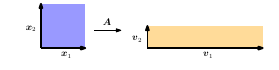

**Fig.6**

Geometric interpretation of eigenvalues. The eigenvectors of $ A $ get stretched by the corresponding eigenvalues. The area of the unit square changes by $ |\lambda_1 \lambda_2| $, the perimeter changes by a factor of $ \frac{1}{2} (|\lambda_1| + |\lambda_2|) $.

**Theorem 4.17.** The trace of a matrix $ A \in \mathbb{R}^{n \times n} $ is the sum of its eigenvalues, i.e.,

$$
\text{tr}(A) = \sum_{i=1}^n \lambda_i, \tag{4.43}
$$

where $ \lambda_i \in \mathbb{C} $ are (possibly repeated) eigenvalues of $ A $.

Let us provide a geometric intuition of these two theorems. Consider a matrix $ A \in \mathbb{R}^{2 \times 2} $ that possesses two linearly independent eigenvectors $ x_1, x_2 $. For this example, we assume $ (x_1, x_2) $ are an ONB of $ \mathbb{R}^2 $ so that they are orthogonal and the area of the square they span is 1; see Figure 4.6.

From Section 4.1, we know that the determinant computes the change of area of unit square under the transformation $ A $. In this example, we can compute the change of area explicitly: Mapping the eigenvectors using $ A $ gives us vectors $ v_1 = A x_1 = \lambda_1 x_1 $ and $ v_2 = A x_2 = \lambda_2 x_2 $, i.e., the new vectors $ v_i $ are scaled versions of the eigenvectors $ x_i $, and the scaling factors are the corresponding eigenvalues $ \lambda_i $. $ v_1, v_2 $ are still orthogonal, and the area of the rectangle they span is $ |\lambda_1 \lambda_2| $.

Given that $ x_1, x_2 $ (in our example) are orthonormal, we can directly compute the perimeter of the unit square as $ 2(1 + 1) $. Mapping the eigenvectors using $ A $ creates a rectangle whose perimeter is $ 2(|\lambda_1| + |\lambda_2|) $. Therefore, the sum of the absolute values of the eigenvalues tells us how the perimeter of the unit square changes under the transformation matrix $ A $.

### Example 4.9 (Google’s PageRank – Webpages as Eigenvectors)

Google uses the eigenvector corresponding to the maximal eigenvalue of a matrix $ A $ to determine the rank of a page for search. The idea for the PageRank algorithm, developed at Stanford University by Larry Page and Sergey Brin in 1996, was that the importance of any web page can be approximated by the importance of pages that link to it. For this, they write down all web sites as a huge directed graph that shows which page links to which.

PageRank computes the weight (importance) $ x_i \geqslant 0 $ of a web site $ a_i $ by counting the number of pages pointing to $ a_i $. Moreover, PageRank takes into account the importance of the web sites that link to $ a_i $. The navigation behavior of a user is then modeled by a transition matrix $ A $ of this graph that tells us with what (click) probability somebody will end up on a different web site.

The matrix $ A $ has the property that for any initial rank/importance vector $ x $ of a web site the sequence $ x, A x, A^2 x, \ldots $ converges to a vector $ x^* $. This vector is called the PageRank and satisfies

$$
A x^* = x^*, \tag{not numbered in text}
$$

i.e., it is an eigenvector (with corresponding eigenvalue 1) of $ A $. After normalizing $ x^* $, such that $ \| x^* \| = 1 $, we can interpret the entries as probabilities. More details and different perspectives on PageRank can be found in the original technical report (Page et al., 1999).

In [5]:
import math

# --- Determinant of a 2x2 Matrix ---
def determinant_2x2(A):
    """
    Compute the determinant of a 2x2 matrix.
    """
    return A[0][0] * A[1][1] - A[0][1] * A[1][0]

# --- Trace of a Matrix ---
def trace(A):
    """
    Compute the trace of a square matrix: sum of diagonal elements.
    """
    n = len(A)
    return sum(A[i][i] for i in range(n))

# --- Compute Eigenvalues of a 2x2 Matrix ---
def compute_eigenvalues(A):
    """
    Compute the eigenvalues of a 2x2 matrix by solving det(A - lambda I) = 0.
    Returns a list of eigenvalues (real only for simplicity).
    """
    if len(A) != 2 or len(A[0]) != 2:
        raise ValueError("This implementation only supports 2x2 matrices")
    
    tr_A = trace(A)
    det_A = determinant_2x2(A)
    # Solve: lambda^2 - tr(A)*lambda + det_A = 0
    discriminant = tr_A**2 - 4 * det_A
    if discriminant < 0:
        raise ValueError("This implementation only handles real eigenvalues")
    
    sqrt_disc = math.sqrt(discriminant)
    lambda1 = (tr_A + sqrt_disc) / 2
    lambda2 = (tr_A - sqrt_disc) / 2
    return [lambda1, lambda2]

# --- Compute Eigenvector ---
def compute_eigenvector(A, lambda_val):
    """
    Compute an eigenvector for the given eigenvalue lambda by solving (A - lambda I)x = 0.
    Returns a non-zero eigenvector.
    """
    M = [[A[i][j] - (lambda_val if i == j else 0) for j in range(2)] for i in range(2)]
    a, b = M[0][0], M[0][1]
    c, d = M[1][0], M[1][1]
    
    if abs(a) > 1e-10:
        x = 1.0
        y = -a * x / b if abs(b) > 1e-10 else 0.0
    elif abs(c) > 1e-10:
        x = 1.0
        y = -c * x / d if abs(d) > 1e-10 else 0.0
    else:
        x = 1.0 if abs(b) > 1e-10 else 0.0
        y = 1.0 if abs(d) > 1e-10 else 0.0
    
    return [x, y]

# --- Dot Product ---
def dot_product(x, y):
    """
    Compute the dot product of two vectors: x^T y
    """
    return sum(xi * yi for xi, yi in zip(x, y))

# --- Norm of a Vector ---
def norm(x):
    """
    Compute the Euclidean norm of a vector: ||x|| = sqrt(x^T x)
    """
    return math.sqrt(dot_product(x, x))

# --- Matrix-Vector Multiplication ---
def matrix_vector_multiply(A, x):
    """
    Multiply matrix A (n x m) by vector x (m x 1). Returns a vector.
    """
    n = len(A)
    result = [0.0] * n
    for i in range(n):
        result[i] = sum(A[i][j] * x[j] for j in range(len(x)))
    return result

# --- Power Iteration to Find PageRank ---
def power_iteration(A, num_iterations=100, tolerance=1e-6):
    """
    Compute the eigenvector corresponding to eigenvalue 1 using power iteration.
    Assumes A is a stochastic matrix (columns sum to 1).
    """
    n = len(A)
    # Initial vector
    x = [1.0 / n] * n
    for _ in range(num_iterations):
        x_new = matrix_vector_multiply(A, x)
        # Normalize to ensure convergence to eigenvector
        norm_x = norm(x_new)
        x_new = [xi / norm_x for xi in x_new]
        # Check for convergence
        if all(abs(x_new[i] - x[i]) < tolerance for i in range(n)):
            break
        x = x_new
    return x

# --- Geometric Intuition (Theorems 4.16, 4.17, and Figure 4.6) ---
print("Geometric Intuition (Theorems 4.16, 4.17, and Figure 4.6)")
# Example matrix with orthonormal eigenvectors
A = [[2, 0], [0, 3]]  # Eigenvectors are [1, 0], [0, 1] (orthonormal)
print("Matrix A:")
for row in A:
    print(row)

# Compute eigenvalues
eigenvalues = compute_eigenvalues(A)
print(f"\nEigenvalues: {eigenvalues}")

# Verify Theorem 4.16: det(A) = product of eigenvalues
det_A = determinant_2x2(A)
product_eigenvalues = eigenvalues[0] * eigenvalues[1]
print(f"\nTheorem 4.16:")
print(f"Determinant of A: {det_A}")
print(f"Product of eigenvalues: {product_eigenvalues}")
print(f"Property det(A) = product of eigenvalues: {abs(det_A - product_eigenvalues) < 1e-10}")

# Verify Theorem 4.17: tr(A) = sum of eigenvalues (Equation 4.43)
tr_A = trace(A)
sum_eigenvalues = sum(eigenvalues)
print(f"\nTheorem 4.17 (Equation 4.43):")
print(f"Trace of A: {tr_A}")
print(f"Sum of eigenvalues: {sum_eigenvalues}")
print(f"Property tr(A) = sum of eigenvalues: {abs(tr_A - sum_eigenvalues) < 1e-10}")

# Compute eigenvectors (should be [1, 0], [0, 1])
x1 = compute_eigenvector(A, eigenvalues[0])
x2 = compute_eigenvector(A, eigenvalues[1])
print(f"\nEigenvectors (orthonormal basis):")
print(f"x1 = {x1}")
print(f"x2 = {x2}")

# Compute area and perimeter changes
area = abs(eigenvalues[0] * eigenvalues[1])
perimeter = 2 * (abs(eigenvalues[0]) + abs(eigenvalues[1]))
print(f"\nGeometric Intuition (Figure 4.6):")
print(f"Area of transformed square: |lambda_1 * lambda_2| = {area}")
print(f"Perimeter of transformed square: 2(|lambda_1| + |lambda_2|) = {perimeter}")

# --- Example 4.9: Google's PageRank ---
print("\nExample 4.9: Google’s PageRank – Webpages as Eigenvectors")
# Simulate a small web graph with 4 pages
# Transition matrix A: A[i][j] is the probability of going from page j to page i
# Each column sums to 1 (stochastic matrix)
A_pagerank = [
    [0, 0.5, 0, 0],      # Page 1 gets links from Page 2
    [1, 0, 0, 0],        # Page 2 gets links from Page 1
    [0, 0.5, 0, 0.5],    # Page 3 gets links from Pages 2 and 4
    [0, 0, 1, 0.5]       # Page 4 gets links from Pages 3 and 4
]
print("Transition Matrix A:")
for row in A_pagerank:
    print(row)

# Compute PageRank vector using power iteration (eigenvector for lambda = 1)
pagerank = power_iteration(A_pagerank)
print(f"\nPageRank Vector (normalized eigenvector for lambda = 1):")
print([round(x, 3) for x in pagerank])

# Verify Ax* = x*
Ax_star = matrix_vector_multiply(A_pagerank, pagerank)
print(f"\nVerification A x* = x*:")
print(f"A x* = {[round(x, 3) for x in Ax_star]}")
print(f"x*   = {[round(x, 3) for x in pagerank]}")
print(f"Property A x* = x*: {all(abs(ax - x) < 1e-3 for ax, x in zip(Ax_star, pagerank))}")

Geometric Intuition (Theorems 4.16, 4.17, and Figure 4.6)
Matrix A:
[2, 0]
[0, 3]

Eigenvalues: [3.0, 2.0]

Theorem 4.16:
Determinant of A: 6
Product of eigenvalues: 6.0
Property det(A) = product of eigenvalues: True

Theorem 4.17 (Equation 4.43):
Trace of A: 5
Sum of eigenvalues: 5.0
Property tr(A) = sum of eigenvalues: True

Eigenvectors (orthonormal basis):
x1 = [1.0, 0.0]
x2 = [0.0, 1.0]

Geometric Intuition (Figure 4.6):
Area of transformed square: |lambda_1 * lambda_2| = 6.0
Perimeter of transformed square: 2(|lambda_1| + |lambda_2|) = 10.0

Example 4.9: Google’s PageRank – Webpages as Eigenvectors
Transition Matrix A:
[0, 0.5, 0, 0]
[1, 0, 0, 0]
[0, 0.5, 0, 0.5]
[0, 0, 1, 0.5]

PageRank Vector (normalized eigenvector for lambda = 1):
[0.0, 0.0, 0.447, 0.894]

Verification A x* = x*:
A x* = [0.0, 0.0, 0.447, 0.894]
x*   = [0.0, 0.0, 0.447, 0.894]
Property A x* = x*: True
